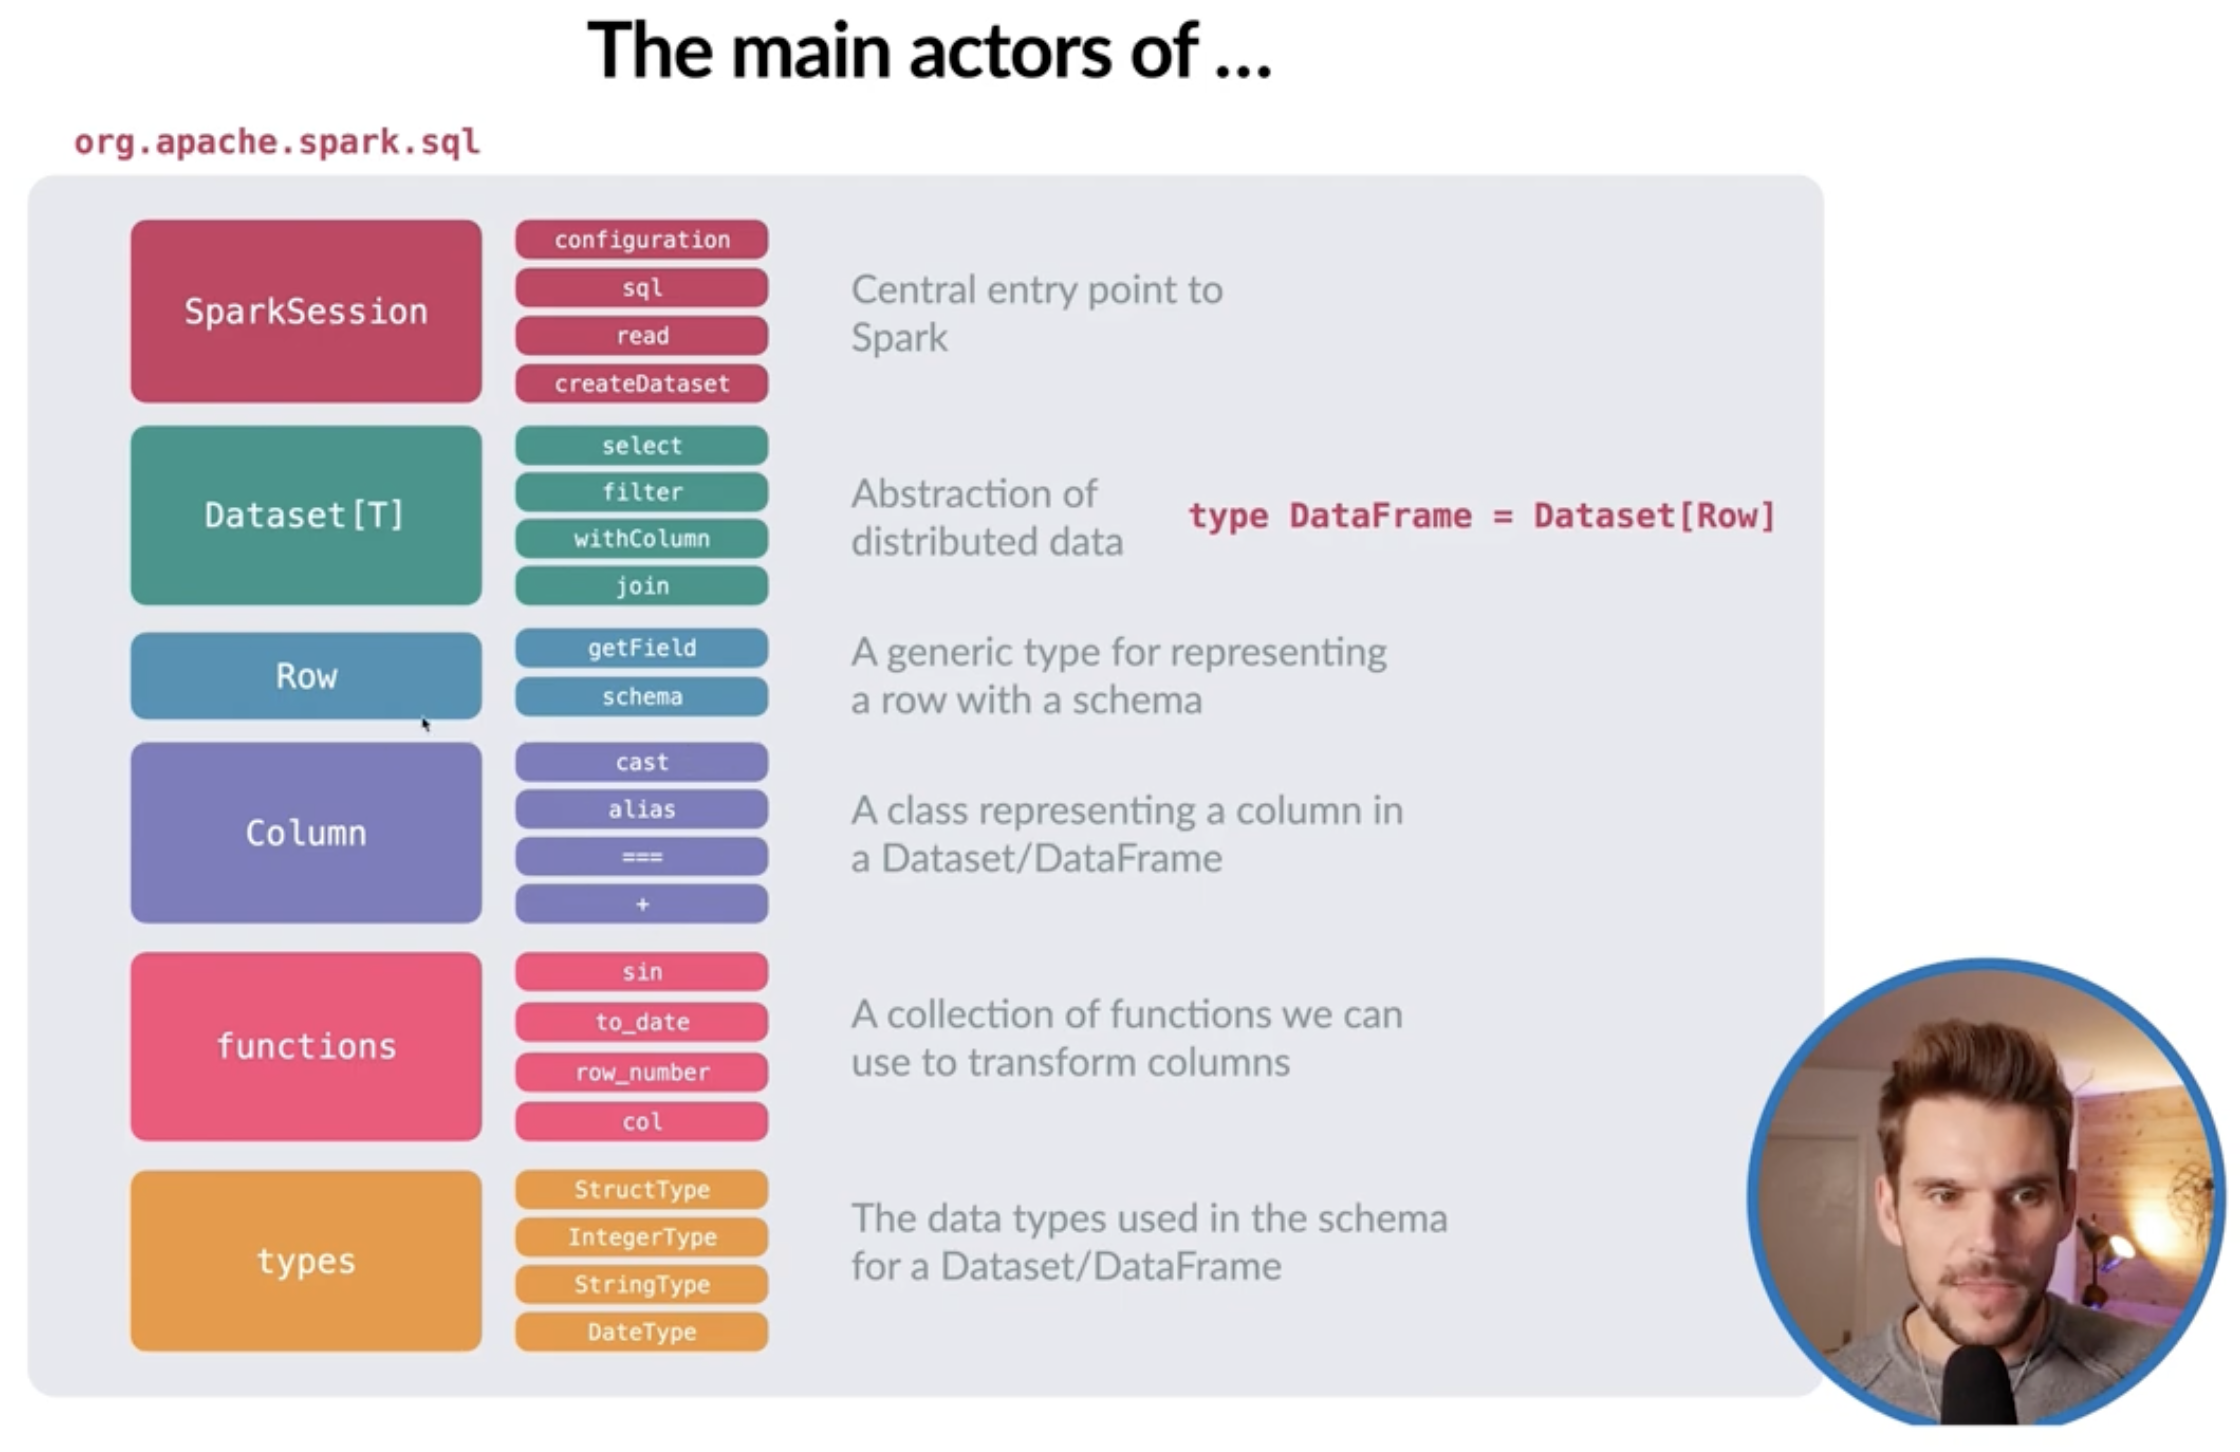

# Quick exploration - pyspark.
### Things that we do in pandas but using pyspark

In [1]:
import pyspark

In [2]:
pyspark.__version__

'4.0.0'

In [3]:
# deploy-mode = local[*] # -> to run things locally on one machine

In [4]:
# import os
# os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/temurin-21.jdk/Contents/Home"
# os.environ.setdefault("SPARK_LOCAL_IP", "127.0.0.1")
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, FloatType

spark = (SparkSession.builder.master("local[*]")
         .config("spark.api.mode","jvm").getOrCreate())

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/08/30 22:43:12 WARN Utils: Your hostname, Anikets-MacBook-Pro.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.8 instead (on interface en0)
25/08/30 22:43:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/30 22:43:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
print(spark.version)

4.0.0


In [6]:
df = spark.read.csv("data/cleaned_engineered_shark_data.csv", header=True, inferSchema=True)

In [7]:
df.show()

+---+--------------+-------------+-------------+-----+--------------------+-------------------+------------------+-----------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+--------------------+---------------------+--------------+--------------------+-----------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------

25/08/30 22:43:15 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [8]:
shape = df.count(), len(df.columns)
shape

(1236, 65)

In [9]:
df.columns

['uin',
 'incident_month',
 'incident_year',
 'victim_injury',
 'state',
 'location',
 'latitude',
 'longitude',
 'site_category',
 'site_category_comment',
 'shark_common_name',
 'shark_scientific_name',
 'shark_identification_method',
 'shark_identification_source',
 'shark_length_m',
 'basis_for_length',
 'provoked_unprovoked',
 'provocative_act',
 'no_sharks',
 'victim_activity',
 'fish_speared_',
 'commercial_dive_activity',
 'object_of_bite',
 'present_at_time_of_bite',
 'direction_first_strike',
 'shark_behaviour',
 'victim_aware_of_shark',
 'shark_captured',
 'injury_location',
 'injury_severity',
 'victim_gender',
 'victim_age',
 'victim_clothing',
 'clothing_coverage',
 'dominant_clothing_colour',
 'other_clothing_colour',
 'clothing_pattern',
 'fin_colour',
 'diversionary_action_taken',
 'diversionary_action_outcome',
 'people_3m',
 'people_3_15m',
 'time_of_incident',
 'depth_of_incident_m',
 'teeth_recovered',
 'time_in_water_min',
 'water_temperature_c',
 'total_water_dep

In [10]:
df.dtypes

[('uin', 'string'),
 ('incident_month', 'int'),
 ('incident_year', 'int'),
 ('victim_injury', 'string'),
 ('state', 'string'),
 ('location', 'string'),
 ('latitude', 'string'),
 ('longitude', 'string'),
 ('site_category', 'string'),
 ('site_category_comment', 'string'),
 ('shark_common_name', 'string'),
 ('shark_scientific_name', 'string'),
 ('shark_identification_method', 'string'),
 ('shark_identification_source', 'string'),
 ('shark_length_m', 'double'),
 ('basis_for_length', 'string'),
 ('provoked_unprovoked', 'string'),
 ('provocative_act', 'string'),
 ('no_sharks', 'double'),
 ('victim_activity', 'string'),
 ('fish_speared_', 'string'),
 ('commercial_dive_activity', 'string'),
 ('object_of_bite', 'string'),
 ('present_at_time_of_bite', 'string'),
 ('direction_first_strike', 'string'),
 ('shark_behaviour', 'string'),
 ('victim_aware_of_shark', 'string'),
 ('shark_captured', 'string'),
 ('injury_location', 'string'),
 ('injury_severity', 'string'),
 ('victim_gender', 'string'),
 ('

In [11]:
df.printSchema()

root
 |-- uin: string (nullable = true)
 |-- incident_month: integer (nullable = true)
 |-- incident_year: integer (nullable = true)
 |-- victim_injury: string (nullable = true)
 |-- state: string (nullable = true)
 |-- location: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- site_category: string (nullable = true)
 |-- site_category_comment: string (nullable = true)
 |-- shark_common_name: string (nullable = true)
 |-- shark_scientific_name: string (nullable = true)
 |-- shark_identification_method: string (nullable = true)
 |-- shark_identification_source: string (nullable = true)
 |-- shark_length_m: double (nullable = true)
 |-- basis_for_length: string (nullable = true)
 |-- provoked_unprovoked: string (nullable = true)
 |-- provocative_act: string (nullable = true)
 |-- no_sharks: double (nullable = true)
 |-- victim_activity: string (nullable = true)
 |-- fish_speared_: string (nullable = true)
 |-- commercial_dive_

In [12]:
# basic summary (count, mean, stddev, min, max) — mostly for numeric cols
df.describe().show()

+-------+--------------------+-----------------+------------------+-------------+-----------------+--------------------+-------------------+------------------+-------------+---------------------+-------------------+---------------------+---------------------------+---------------------------+------------------+--------------------+-------------------+--------------------+------------------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+--------------------+---------------------+--------------+---------------+---------------+-------------+-----------------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+--------------------+-----------------+------------------+-------------------+---------------+------------------+-------------------+-------------------+------------------+-------------------+-------------

In [13]:
# add percentiles like pandas (25%, 50%, 75%)
df.summary("count","mean","stddev","min","25%","50%","75%","max").show()

25/08/30 22:43:17 WARN DAGScheduler: Broadcasting large task binary with size 1008.7 KiB


+-------+--------------------+-----------------+------------------+-------------+-----------------+--------------------+-------------------+------------------+-------------+---------------------+-------------------+---------------------+---------------------------+---------------------------+------------------+--------------------+-------------------+--------------------+------------------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+--------------------+---------------------+--------------+---------------+---------------+-------------+-----------------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+--------------------+-----------------+------------------+-------------------+---------------+------------------+-------------------+-------------------+------------------+-------------------+-------------

In [ ]:
df.count()

1236

In [15]:
null_counts = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------------------+------------------------+----------

In [16]:


nan_cols = {f.name for f in df.schema.fields if isinstance(f.dataType, (DoubleType, FloatType))}

missing_counts = df.select([
    F.sum(
        F.when(F.col(c).isNull(), 1)
         .when(F.isnan(F.col(c)), 1) if c in nan_cols else
        F.when(F.trim(F.col(c)) == "", 1).otherwise(0)  # keep/remove this line if you want "" counted
    ).alias(c)
    for c in df.columns
])
missing_counts.show()


+---+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------------------+------------------------+----------

In [17]:
missing_pct = missing_counts.select([ (F.col(c)/shape[0]).alias(c) for c in missing_counts.columns ])
missing_pct.show()

+---+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+------------------+----------------+-------------------+---------------+-------------------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+-------------------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------------+------------------+-------------------+---------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+------------------+--------------------------+--

In [18]:
# non-null counts per column (like info’s non-null)
df.select([F.count(F.col(c)).alias(c) for c in df.columns]).show()

+----+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------------------+------------------------+---------

In [19]:
# null counts per column
df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+---+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------------------+------------------------+----------

In [20]:
# distinct counts (useful for categoricals)
df.agg(*[F.countDistinct(c).alias(c) for c in df.columns]).show()

+----+--------------+-------------+-------------+-----+--------+--------+---------+-------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+----------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+---------------+---------------------+--------------+---------------+---------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------------------+------------------------+---------

In [28]:
df.select("victim_injury").distinct().orderBy("victim_injury").show()

+-------------+
|victim_injury|
+-------------+
|         NULL|
|        fatal|
|  head, torso|
|      injured|
|    uninjured|
|      unknown|
+-------------+



In [ ]:
df.select("victim_injury").distinct().count()   

6

In [34]:
df.select("victim_injury").show()

+-------------+
|victim_injury|
+-------------+
|        fatal|
|      injured|
|      injured|
|        fatal|
|      injured|
|      injured|
|      injured|
|      injured|
|      injured|
|        fatal|
|        fatal|
|        fatal|
|        fatal|
|        fatal|
|        fatal|
|      injured|
|      injured|
|        fatal|
|      injured|
|        fatal|
+-------------+
only showing top 20 rows


In [32]:
from pyspark.sql import functions as F

df_filt = df.filter(
    (F.col("incident_month").cast("int").between(8, 12)) &
    (F.col("incident_year").cast("int")  > 1990) &
    (F.lower(F.col("victim_injury")) == "fatal") &
    (F.col("no_sharks").cast("int")     >= 1) &
    (F.col("victim_age").cast("int")    < 25)
)

df_filt.show()


+----+--------------+-------------+-------------+-----+--------------------+-------------------+------------------+-----------------+---------------------+-----------------+---------------------+---------------------------+---------------------------+--------------+--------------------+-------------------+---------------+---------+---------------+-------------+------------------------+--------------+-----------------------+----------------------+--------------------+---------------------+--------------+---------------+-----------------+-------------+----------+---------------+-----------------+------------------------+---------------------+----------------+----------+-------------------------+---------------------------+---------+------------+----------------+-------------------+---------------+-----------------+-------------------+-------------------+------------------+-------------------+-------------------+-----------+--------------+-----------------+-----------------+--------------

In [39]:
(df.groupBy("victim_injury")
   .count()
   .orderBy(F.desc("count"))
   .show(5, truncate=False))

+-------------+-----+
|victim_injury|count|
+-------------+-----+
|injured      |748  |
|fatal        |255  |
|uninjured    |229  |
|NULL         |2    |
|unknown      |1    |
+-------------+-----+
only showing top 5 rows
